## This project is based on Data Analytics 
### Where we find some Questions
####
1. You need to calculate the monthly sales of the store and identify which month had the 
highest sales and which month had the lowest sales.
2. You need to analyze sales based on product categories and determine which category has 
the lowest sales and which category has the highest sales.
3. The sales analysis needs to be done based on sub-categories
4. You need to analyze the monthly profit from sales and determine which month had the 
highest profit.
5. Analyze the profit by category and sub-category.
6. Analyze the sales and profit by customer segment
7. Analyze the sales to profit rati

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as colors


In [37]:
df = pd.read_csv('Sample_Superstore.csv',encoding= 'unicode_escape')

In [38]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [39]:
df.shape

(9994, 21)

In [40]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [42]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [43]:
#delete unwanted value
df=df.drop(columns= 'Postal Code',axis = 1)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [44]:
df.shape

(9994, 20)

In [45]:
df.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,229.858001,3.789574,0.156203,28.656896
std,2885.163629,623.245101,2.225110,0.206452,234.260108
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,22638.480000,14.000000,0.800000,8399.976000


In [46]:
#converting
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [48]:
df['Order_month']=df['Order Date'].dt.month
df['Order_year']=df['Order Date'].dt.year
df['Order_day_of_Week']=df['Order Date'].dt.dayofweek

In [49]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_month,Order_year,Order_day_of_Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [50]:
sales_by_month=df.groupby('Order_month')['Sales'].sum().reset_index()
sales_by_month

,Order_month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


Text(0.5, 1.0, 'Monthly Sales')

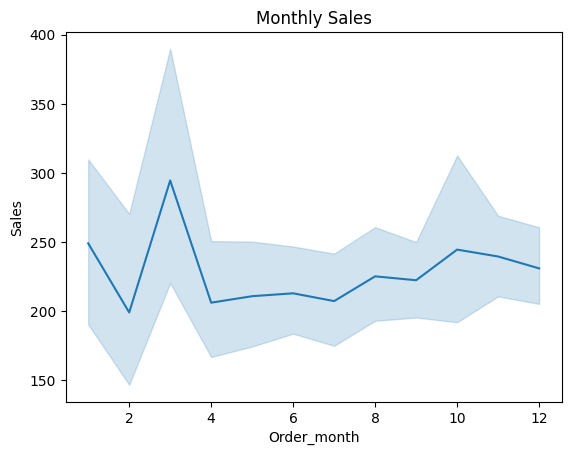

In [51]:
plt.Figure(figsize=(300,5))
sns.lineplot(x='Order_month',y='Sales',data=df)
plt.title('Monthly Sales')

In [52]:
fig = px.line(sales_by_month,x='Order_month',y='Sales',title='Monthly Sales Analysis')
fig.show()

In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_month,Order_year,Order_day_of_Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


In [54]:
sales_by_category=df.groupby('Category')['Sales'].sum().reset_index()
sales_by_category

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


Text(0.5, 1.0, 'Sales by Category')

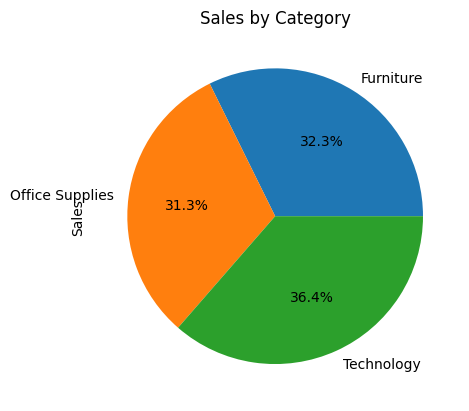

In [55]:
df.groupby('Category')['Sales'].sum().plot.pie(autopct='%1.1f%%')
plt.title('Sales by Category')

In [56]:
fig = px.pie(sales_by_category,values='Sales',names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sale Analysis by Category',title_font=dict(size=24))
fig.show()

In [57]:
# Sales Analysis by sub category
sales_by_SubCategory = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sales_by_SubCategory

,Sub-Category,Sales
0,Accessories,167380.3180
1,Appliances,107532.1610
2,Art,27118.7920
3,Binders,203412.7330
4,Bookcases,114879.9963
5,Chairs,328449.1030
6,Copiers,149528.0300
7,Envelopes,16476.4020
8,Fasteners,3024.2800
9,Furnishings,91705.1640


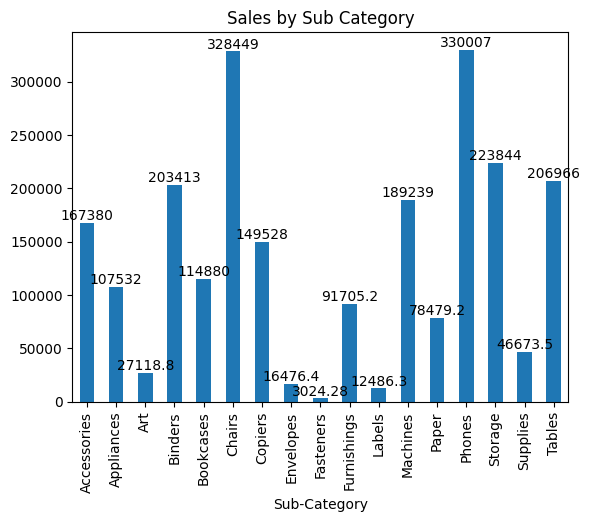

In [58]:
plt.Figure(figsize=(30,20))
ax=df.groupby('Sub-Category')['Sales'].sum().plot.bar()
plt.title("Sales by Sub Category")

for bars in ax.containers:
    ax.bar_label(bars)

In [59]:
fig = px.bar(sales_by_SubCategory,x='Sub-Category',y='Sales',title="Sales Analysis by Sub Category")
fig.show()

In [60]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_month,Order_year,Order_day_of_Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,1
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,1
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,6
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,6


<Axes: xlabel='Order_month', ylabel='Profit'>

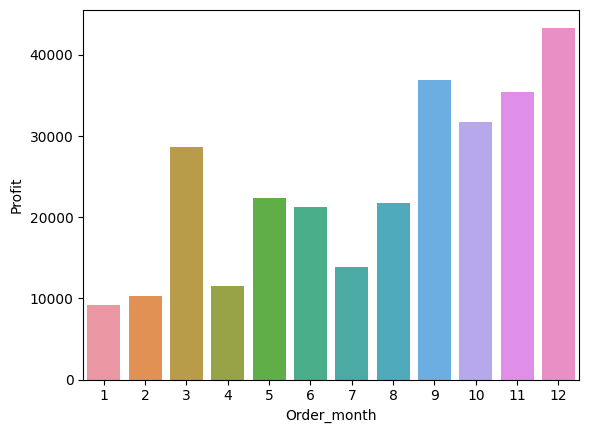

In [61]:
# monthly profit Analysis
# profit_by_month=df.groupby('Order_month')['Profit'].sum().reset_index()
# profit_by_month

profit_by_month = df.groupby(['Order_month'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
sns.barplot(data = profit_by_month, x = 'Order_month',y= 'Profit')


In [62]:
profit_by_month=df.groupby('Order_month')['Profit'].sum().reset_index()
profit_by_month


,Order_month,Profit
0,1,9134.4461
1,2,10294.6107
2,3,28594.6872
3,4,11587.4363
4,5,22411.3078
5,6,21285.7954
6,7,13832.6648
7,8,21776.9384
8,9,36857.4753
9,10,31784.0413


In [63]:
fig = px.line(profit_by_month,x='Order_month',y='Profit',title='Monthly profit Analysis')
fig.show()

In [64]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
profit_by_category

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


In [65]:
fig=px.bar(profit_by_category,x='Category',y='Profit',title='PRofit by Category')
fig.show()

In [66]:
fig = px.pie(profit_by_category,values='Profit',names='Category',hole=0.5,color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.update_layout(title_text='Sale Analysis by Category',title_font=dict(size=24))
fig.show()

In [67]:
profit_by_Subcategory = df.groupby('Sub-Category')['Profit'].sum().reset_index()
profit_by_Subcategory

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


In [68]:
fig=px.bar(profit_by_Subcategory,x='Sub-Category',y='Profit',title='Profit by Sub Category')
fig.show()

In [69]:
#sale And profit for customer Segment
sales_profit_by_segment =df.groupby('Segment').agg({'Sales':'sum','Profit':'sum'}).reset_index()
color_palette=colors.qualitative.Pastel

fig=go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Sales'],
                     name='Sales',
                     marker_color=color_palette[0]))

fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'],
                     y=sales_profit_by_segment['Profit'],
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis By Customer Segment',xaxis_title='Customer segment',yaxis_title='Amount')
fig.show()

In [70]:
# Grouping by Segment and calculating total Sales and Profit
sales_profit_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Calculating Sales-to-Profit Ratio
sales_profit_by_segment['Sales_to_profit_ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']

# Printing the Segment and Sales-to-Profit Ratio
print(sales_profit_by_segment[['Segment', 'Sales_to_profit_ratio']])


       Segment  Sales_to_profit_ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
